In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [9]:
df = pd.read_csv("/content/drive/MyDrive/2025-2 MLP/source/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
x = df.drop(["BMI", "Outcome"], axis=1)
y = df["BMI"]
x, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
 0              6      148             72             35        0   
 1              1       85             66             29        0   
 2              8      183             64              0        0   
 3              1       89             66             23       94   
 4              0      137             40             35      168   
 ..           ...      ...            ...            ...      ...   
 763           10      101             76             48      180   
 764            2      122             70             27        0   
 765            5      121             72             23      112   
 766            1      126             60              0        0   
 767            1       93             70             31        0   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                       0.351   31  
 2                       0.672   32  
 3                

In [21]:
Y = y.values
Y

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
       23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
       32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
       37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.8, 32.4, 36.6, 38.5,
       37.1, 26.5, 19.1, 32. , 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7,
       49.7, 39. , 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4,
       33.3, 34. , 31.2, 34. , 30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2,
       34.2, 33.6, 26.8, 33.3, 55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3,
       34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5,
       32.4, 32.8,  0. , 32.8, 30.5, 33.7, 27.3, 37

In [22]:
X = x.values
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mse",   # Change to Mean Squared Error for regression
    metrics=["mae"] # Add Mean Absolute Error as a metric
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 548.8004 - mae: 16.4042 - val_loss: 250.9651 - val_mae: 12.6777
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 285.0337 - mae: 12.4576 - val_loss: 184.0393 - val_mae: 11.3587
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 160.4141 - mae: 9.6316 - val_loss: 131.2544 - val_mae: 9.4182
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 97.0619 - mae: 7.5247 - val_loss: 114.3854 - val_mae: 8.7508
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 111.3003 - mae: 7.7492 - val_loss: 121.0758 - val_mae: 8.8750
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 98.7855 - mae: 7.3780 - val_loss: 103.9232 - val_mae: 8.1584
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 99.4996 - mae: 7.3738 - val_loss: 121.1432 - val_mae: 8.8959
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81.7880 - mae: 6.9364 - val_loss: 104.4668 - val_mae: 8.3633
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/ste

In [38]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


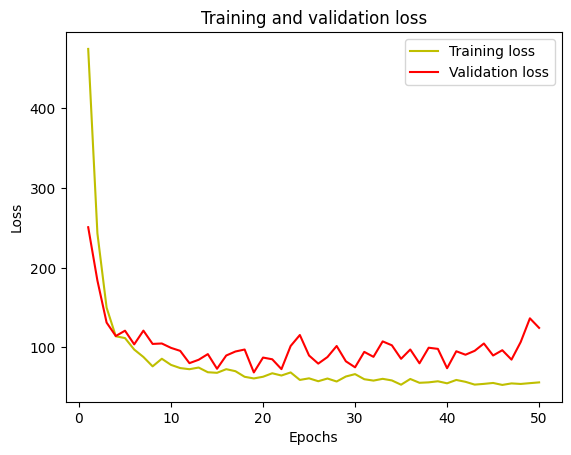

In [40]:
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

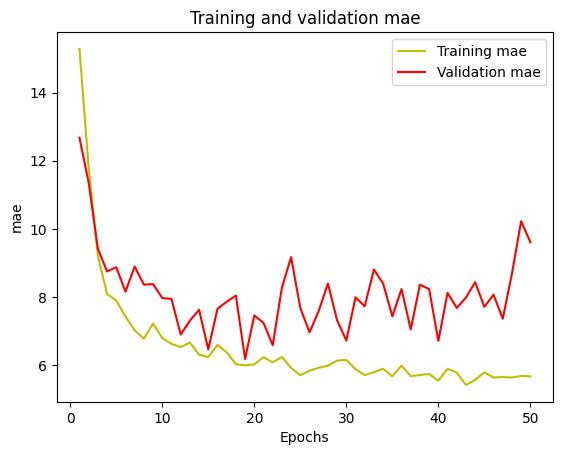

In [41]:
mae = history.history['mae']
val_mae =history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'y', label='Training mae')
plt.plot(epochs, val_mae, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [42]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

Test Loss: 117.6510
Test MAE: 9.3011
